### Hypothesis Testing



In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Difference in Population Proportions

**Null Hypothesis:** p1 - p2 = 0  
**Alternative Hypthosis:** p1 - p2 $\neq$ = 0  


In [5]:
n1 = 24
p1 = .37

n2 = 30
p2 = .39

population1 = np.random.binomial(1, p1, n1)
population2 = np.random.binomial(1, p2, n2)

In [6]:
sm.stats.ttest_ind(population1, population2)

(0.2573343131850836, 0.7979362994787345, 52.0)

In [7]:
n1 = 5000
p1 = .37

n2 = 5000
p2 = .39

population1 = np.random.binomial(1, p1, n1)
population2 = np.random.binomial(1, p2, n2)

In [8]:
sm.stats.ttest_ind(population1, population2)

(-4.079729358124375, 4.543824662019545e-05, 9998.0)

#### One Population Mean

**Null Hypothesis:** $\mu$ = 80 
<br>**Alternative Hypthosis**: $\mu$ > 80

**Data**:
<br>25 adult participants. 
<br>$\mu = 83.84$
<br>$\sigma = 10.72$

In [9]:
cwdata = np.array([80.57, 98.96, 85.28, 83.83, 69.94, 89.59, 91.09, 66.25, 91.21, 82.7 , 73.54, 81.99, 54.01, 
                 82.89, 75.88, 98.32, 107.2 , 85.53, 79.08, 84.3 , 89.32, 86.35, 78.98, 92.26, 87.01])

In [10]:
n = len(cwdata)
mean = cwdata.mean()
sd = cwdata.std()
(n, mean, sd)

(25, 83.84320000000001, 10.716018932420752)

In [12]:
sm.stats.ztest(cwdata, value = 80, alternative = "larger")

(1.756973189172546, 0.039461189601168366)

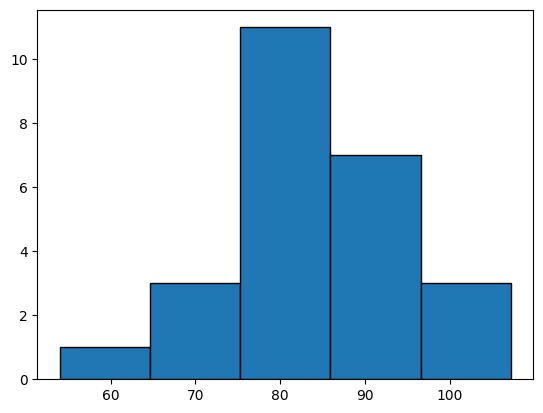

In [13]:
plt.hist(cwdata,bins=5,edgecolor='k')
plt.show()

#### Difference in Population Means

##### Research Question 

Considering adults in the [NHANES data](https://www.cdc.gov/nchs/nhanes/index.htm), do males have a significantly higher mean [Body Mass Index](https://www.cdc.gov/healthyweight/assessing/bmi/index.html) than females?

**Population**: Adults in the NHANES data.  
**Parameter of Interest**: $\mu_1 - \mu_2$, Body Mass Index.  

**Null Hypothesis:** $\mu_1 = \mu_2$  
**Alternative Hypthosis:** $\mu_1 \neq \mu_2$

**Data:**

2976 Females 
$\mu_1 = 29.94$  
$\sigma_1 = 7.75$  

2759 Male Adults  
$\mu_2 = 28.78$  
$\sigma_2 = 6.25$  

$\mu_1 - \mu_2 = 1.16$

In [14]:
url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [15]:
females = da[da["RIAGENDR"] == 2]
male = da[da["RIAGENDR"] == 1]

In [16]:
n1 = len(females)
mu1 = females["BMXBMI"].mean()
sd1 = females["BMXBMI"].std()

(n1, mu1, sd1)

(2976, 29.93994565217392, 7.753318809545674)

In [17]:
n2 = len(male)
mu2 = male["BMXBMI"].mean()
sd2 = male["BMXBMI"].std()

(n2, mu2, sd2)

(2759, 28.778072111846942, 6.2525676168014614)

In [21]:
sm.stats.ztest(females["BMXBMI"].dropna(), male["BMXBMI"].dropna(),alternative='two-sided')

(6.1755933531383205, 6.591544431126401e-10)

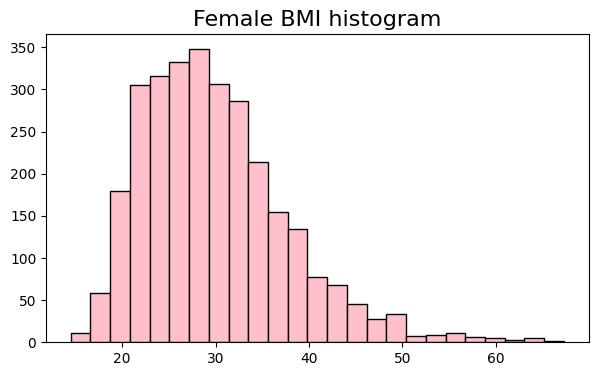

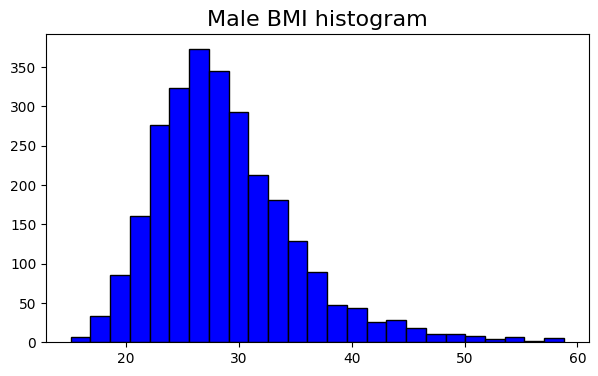

In [22]:
plt.figure(figsize=(7,4))
plt.title("Female BMI histogram",fontsize=16)
plt.hist(females["BMXBMI"].dropna(),edgecolor='k',color='pink',bins=25)
plt.show()

plt.figure(figsize=(7,4))
plt.title("Male BMI histogram",fontsize=16)
plt.hist(male["BMXBMI"].dropna(),edgecolor='k',color='blue',bins=25)
plt.show()